In [1]:
from sectionproperties.analysis import Section
from sectionproperties.pre import CompoundGeometry
from sectionproperties.pre.library import rectangular_section, circular_section, circular_hollow_section, rectangular_hollow_section
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget
#pv.set_jupyter_backend('trame')
pv.set_jupyter_backend('static')
pv.global_theme.colorbar_orientation = 'vertical'

## Obdélník

In [3]:
h= 60
b = 40
geom = rectangular_section(d=h, b=b)
#geom.plot_geometry()

geom.create_mesh(mesh_sizes=h*b/1000)

sec = Section(geometry=geom)
#sec.plot_mesh(materials=False)

sec.calculate_geometric_properties()
sec.calculate_warping_properties()
#sec.calculate_plastic_properties()

In [4]:
#sec.display_results(fmt="g")

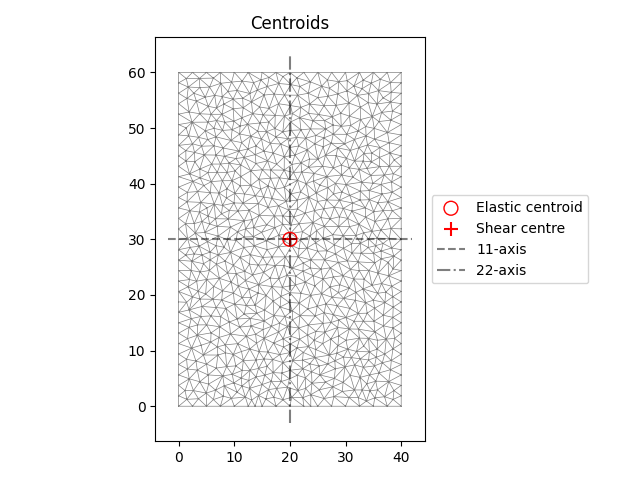

<Axes: title={'center': 'Centroids'}>

In [5]:
sec.plot_centroids()

In [6]:
case1 = sec.calculate_stress(mzz=1e6)

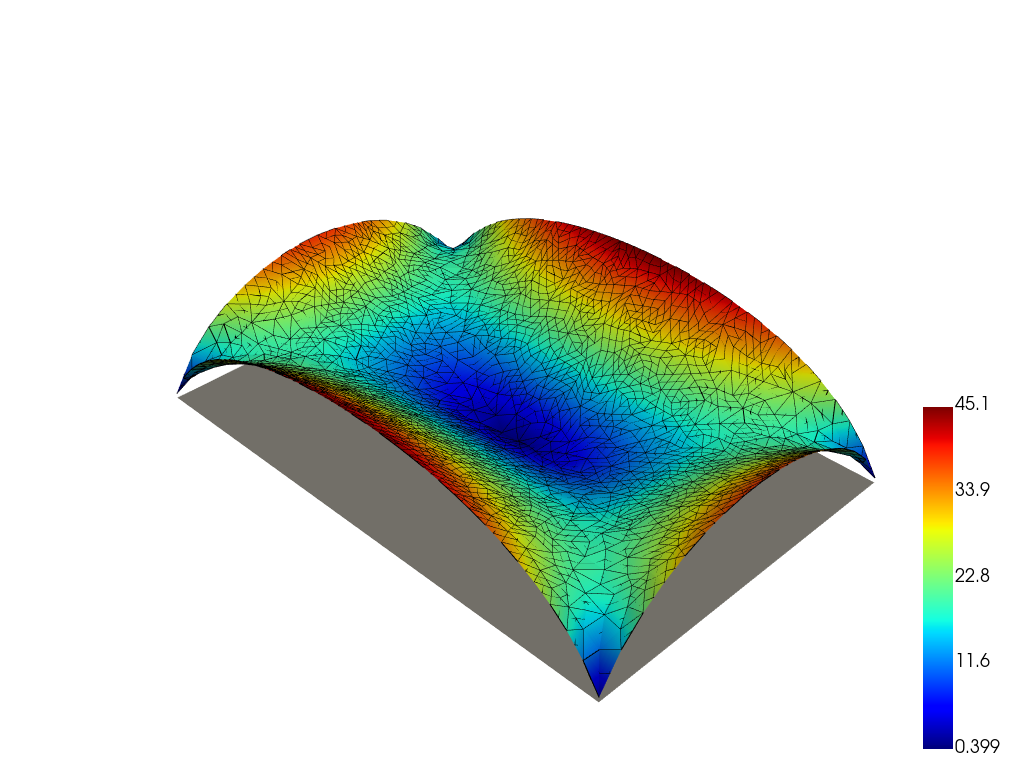

In [7]:
vertices = geom.mesh['vertices']
vertices = np.hstack((vertices, np.zeros((vertices.shape[0], 1))))
triangles = geom.mesh['triangles']
triangles = np.hstack((np.ones((triangles.shape[0], 1)) * 6, triangles)).astype(int)

point_cloud1 = pv.PolyData(vertices, triangles)
vertices2 = vertices.copy()

#s = case1.get_stress()[0]["sig_zx_mzz"] + case1.get_stress()[0]["sig_zy_mzz"]
s = case1.get_stress()[0]["sig_zxy_mzz"]
vertices2[:, -1] += np.abs(s * .3)
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

z = vertices[:, 1].copy()
cz = -sec.get_c()[1]
z -= sec.get_c()[1]

Sy = b/8*(h**2-4*z**2)
Iy = sec.get_ic()[0]
# tau = Vy * Sy / Iy / b
# vertices3 = vertices.copy()
# vertices3[:, -1] += tau * 100
# point_cloud3 = pv.PolyData(vertices3, triangles)
# point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey', render_points_as_spheres=True)
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud2, scalars=s, cmap='jet')
#pl.add_mesh(point_cloud3, scalars=tau, render_points_as_spheres=True)

# pl.camera_position = [(-309.3239134228143, 190.9448824743177, 361.0875938420543),
#  (261.84846177303075, 45.81828788132555, -203.1925420629693),
#  (0.15391266219003122, 0.98330165885624, -0.09710169982108453)]

pl.show()

## Kruh

In [8]:
geom = circular_section(60, 100)
#geom = circular_hollow_section(60, 5, 100)
#geom.plot_geometry()

geom.create_mesh(mesh_sizes=1)

sec = Section(geometry=geom)
#sec.plot_mesh(materials=False)

sec.calculate_geometric_properties()
sec.calculate_warping_properties()
#sec.calculate_plastic_properties()

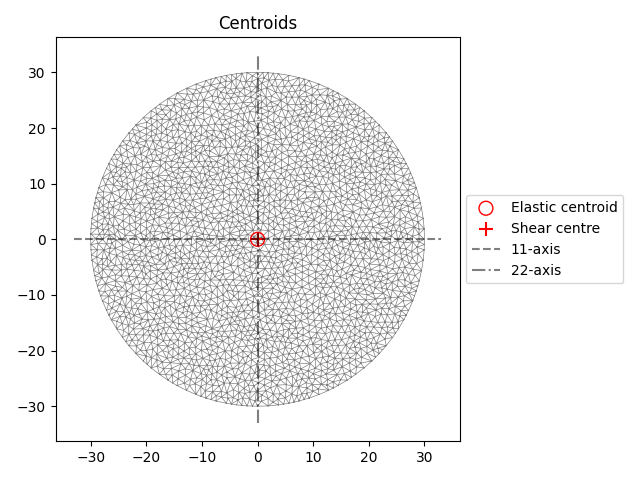

<Axes: title={'center': 'Centroids'}>

In [9]:
sec.plot_centroids()

In [10]:
case1 = sec.calculate_stress(mzz=1e6)

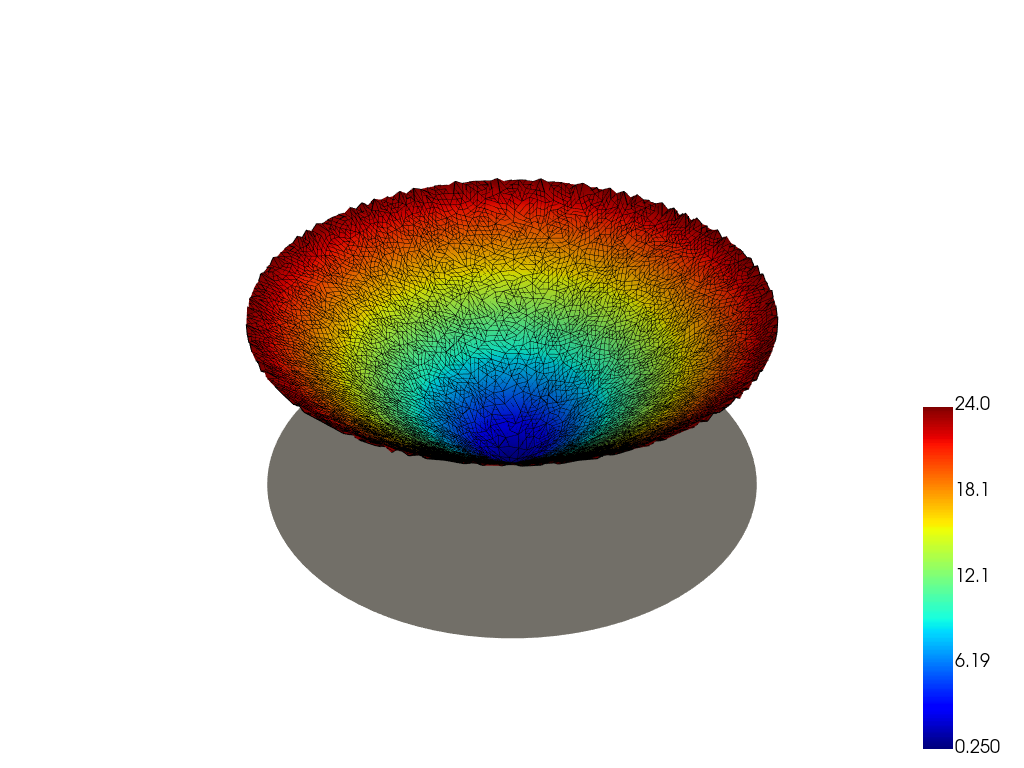

In [11]:
vertices = geom.mesh['vertices']
vertices = np.hstack((vertices, np.zeros((vertices.shape[0], 1))))
triangles = geom.mesh['triangles']
triangles = np.hstack((np.ones((triangles.shape[0], 1)) * 6, triangles)).astype(int)

point_cloud1 = pv.PolyData(vertices, triangles)
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zxy_mzz"]#case1.get_stress()[0]["sig_zx_vy"]#
vertices2[:, -1] += s * 1
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

z = vertices[:, 1].copy()
cz = -sec.get_c()[1]
z -= sec.get_c()[1]

#Sy = b/8*(h**2-4*z**2)
#Iy = sec.get_ic()[0]
# tau = Vy * Sy / Iy / b
# vertices3 = vertices.copy()
# vertices3[:, -1] += tau * 100
# point_cloud3 = pv.PolyData(vertices3, triangles)
# point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey', render_points_as_spheres=True)
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud2, scalars=s, cmap='jet')
#pl.add_mesh(point_cloud3, scalars=tau, render_points_as_spheres=True)

# pl.camera_position = [(-309.3239134228143, 190.9448824743177, 361.0875938420543),
#  (261.84846177303075, 45.81828788132555, -203.1925420629693),
#  (0.15391266219003122, 0.98330165885624, -0.09710169982108453)]

pl.show()

## Trubka

In [12]:
#geom = circular_section(60, 100)
geom = circular_hollow_section(60, 5, 100)
#geom.plot_geometry()

geom.create_mesh(mesh_sizes=1)

sec = Section(geometry=geom)
#sec.plot_mesh(materials=False)

sec.calculate_geometric_properties()
sec.calculate_warping_properties()
#sec.calculate_plastic_properties()

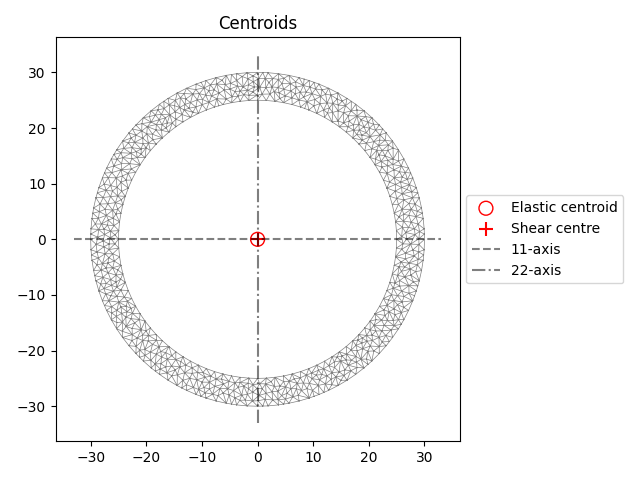

<Axes: title={'center': 'Centroids'}>

In [13]:
sec.plot_centroids()

In [14]:
case1 = sec.calculate_stress(mzz=1e6)

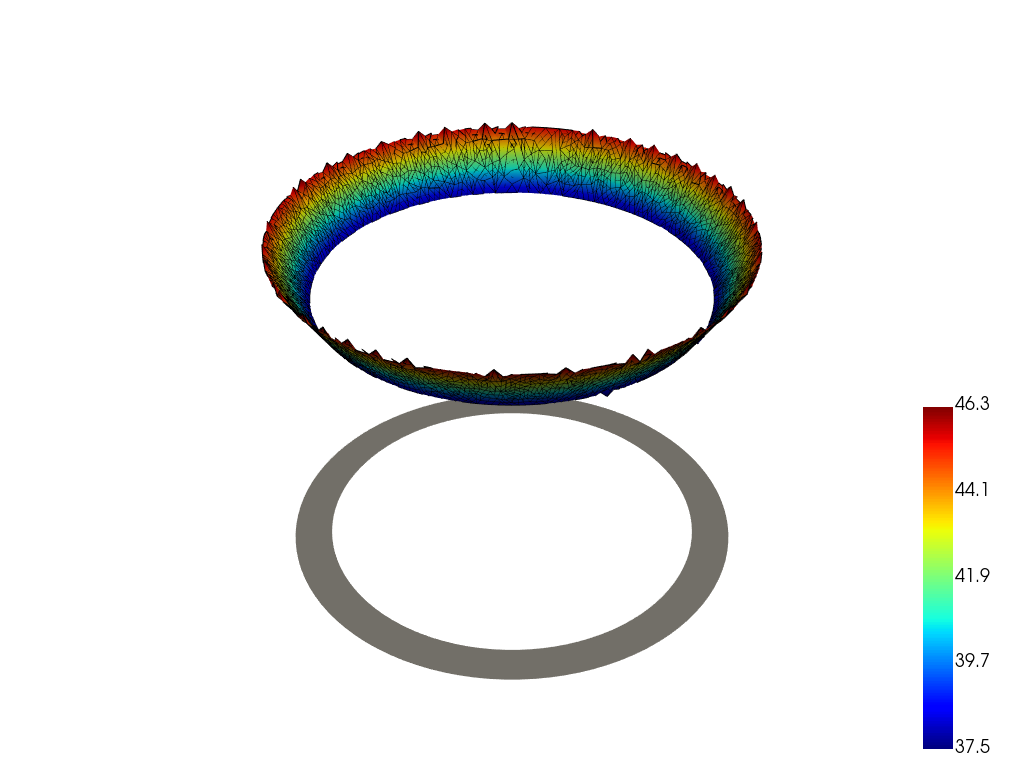

In [15]:
vertices = geom.mesh['vertices']
vertices = np.hstack((vertices, np.zeros((vertices.shape[0], 1))))
triangles = geom.mesh['triangles']
triangles = np.hstack((np.ones((triangles.shape[0], 1)) * 6, triangles)).astype(int)

point_cloud1 = pv.PolyData(vertices, triangles)
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zxy_mzz"]#case1.get_stress()[0]["sig_zx_vy"]#
vertices2[:, -1] += s * 1
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

z = vertices[:, 1].copy()
cz = -sec.get_c()[1]
z -= sec.get_c()[1]

#Sy = b/8*(h**2-4*z**2)
#Iy = sec.get_ic()[0]
# tau = Vy * Sy / Iy / b
# vertices3 = vertices.copy()
# vertices3[:, -1] += tau * 100
# point_cloud3 = pv.PolyData(vertices3, triangles)
# point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey', render_points_as_spheres=True)
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud2, scalars=s, cmap='jet')
#pl.add_mesh(point_cloud3, scalars=tau, render_points_as_spheres=True)

# pl.camera_position = [(-309.3239134228143, 190.9448824743177, 361.0875938420543),
#  (261.84846177303075, 45.81828788132555, -203.1925420629693),
#  (0.15391266219003122, 0.98330165885624, -0.09710169982108453)]

pl.show()

## Rozříznutá trubka

In [16]:
#geom = circular_section(60, 100)
geom = circular_hollow_section(60, 5, 100)
cut_rect = rectangular_section(1, 30).shift_section(0, -.5)

geom = geom - cut_rect
#geom.plot_geometry()

geom.create_mesh(mesh_sizes=1)

sec = Section(geometry=geom)
#sec.plot_mesh(materials=False)

sec.calculate_geometric_properties()
sec.calculate_warping_properties()
#sec.calculate_plastic_properties()

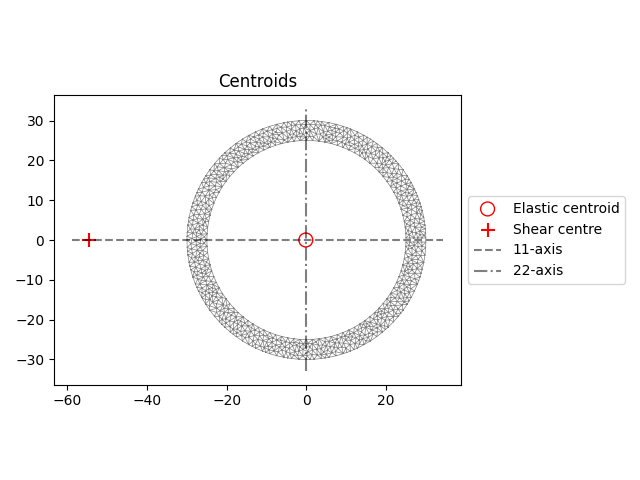

<Axes: title={'center': 'Centroids'}>

In [17]:
sec.plot_centroids()

In [18]:
case1 = sec.calculate_stress(mzz=1e6)

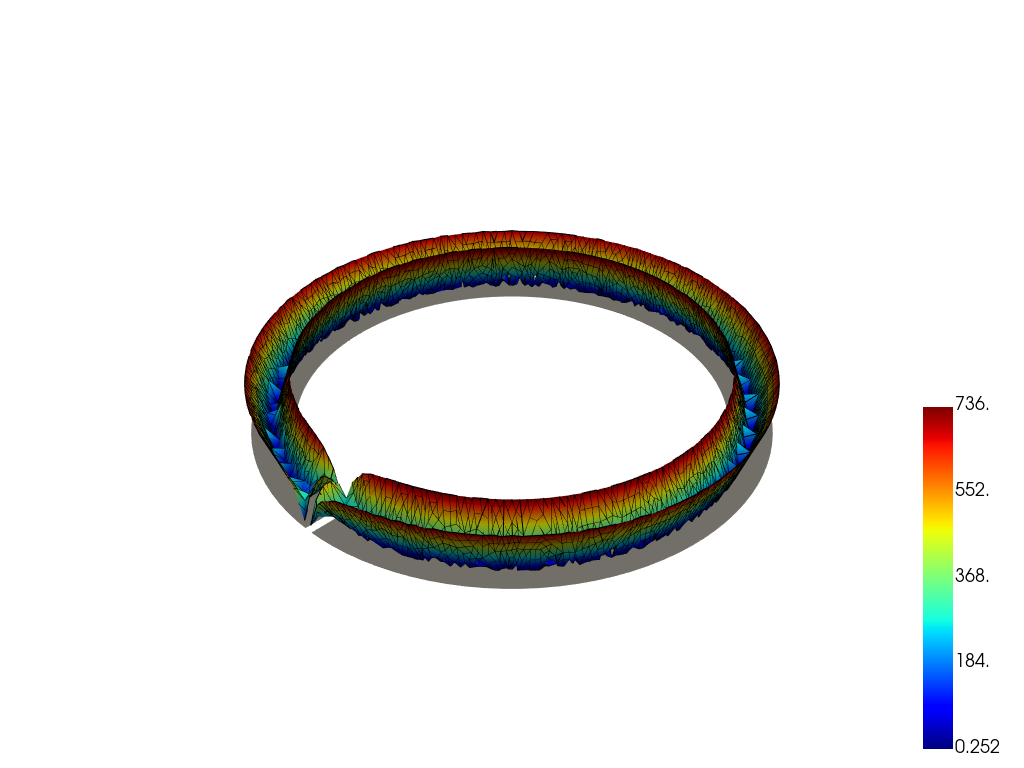

In [19]:
vertices = geom.mesh['vertices']
vertices = np.hstack((vertices, np.zeros((vertices.shape[0], 1))))
triangles = geom.mesh['triangles']
triangles = np.hstack((np.ones((triangles.shape[0], 1)) * 6, triangles)).astype(int)

point_cloud1 = pv.PolyData(vertices, triangles)
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zxy_mzz"]#case1.get_stress()[0]["sig_zx_vy"]#
vertices2[:, -1] += s * 1e-2
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

z = vertices[:, 1].copy()
cz = -sec.get_c()[1]
z -= sec.get_c()[1]

#Sy = b/8*(h**2-4*z**2)
#Iy = sec.get_ic()[0]
# tau = Vy * Sy / Iy / b
# vertices3 = vertices.copy()
# vertices3[:, -1] += tau * 100
# point_cloud3 = pv.PolyData(vertices3, triangles)
# point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey', render_points_as_spheres=True)
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud2, scalars=s, cmap='jet')
#pl.add_mesh(point_cloud3, scalars=tau, render_points_as_spheres=True)

# pl.camera_position = [(-309.3239134228143, 190.9448824743177, 361.0875938420543),
#  (261.84846177303075, 45.81828788132555, -203.1925420629693),
#  (0.15391266219003122, 0.98330165885624, -0.09710169982108453)]

pl.show()

## Tenkostěnný uzavřený

In [20]:
rect1 = rectangular_section(140, 140)
rect2 = rectangular_section(115, 120).shift_section(x_offset=10, y_offset=10)

geom = rect1 - rect2
geom.create_mesh(mesh_sizes=10)

sec = Section(geometry=geom)
#sec.plot_mesh(materials=False)

sec.calculate_geometric_properties()
sec.calculate_warping_properties()
#sec.calculate_plastic_properties()

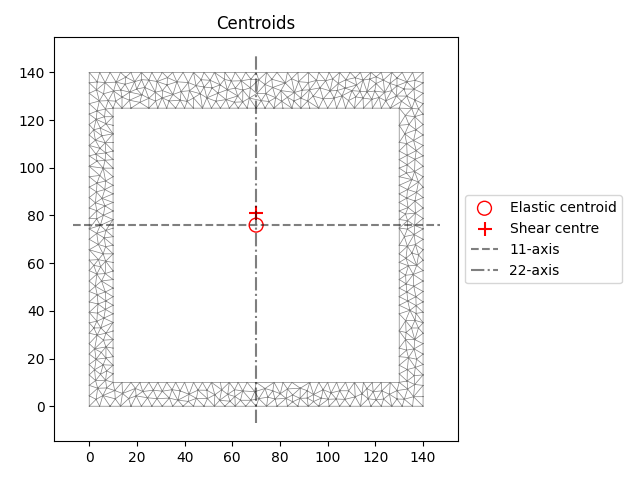

<Axes: title={'center': 'Centroids'}>

In [21]:
sec.plot_centroids()

In [22]:
case1 = sec.calculate_stress(mzz=1e6)

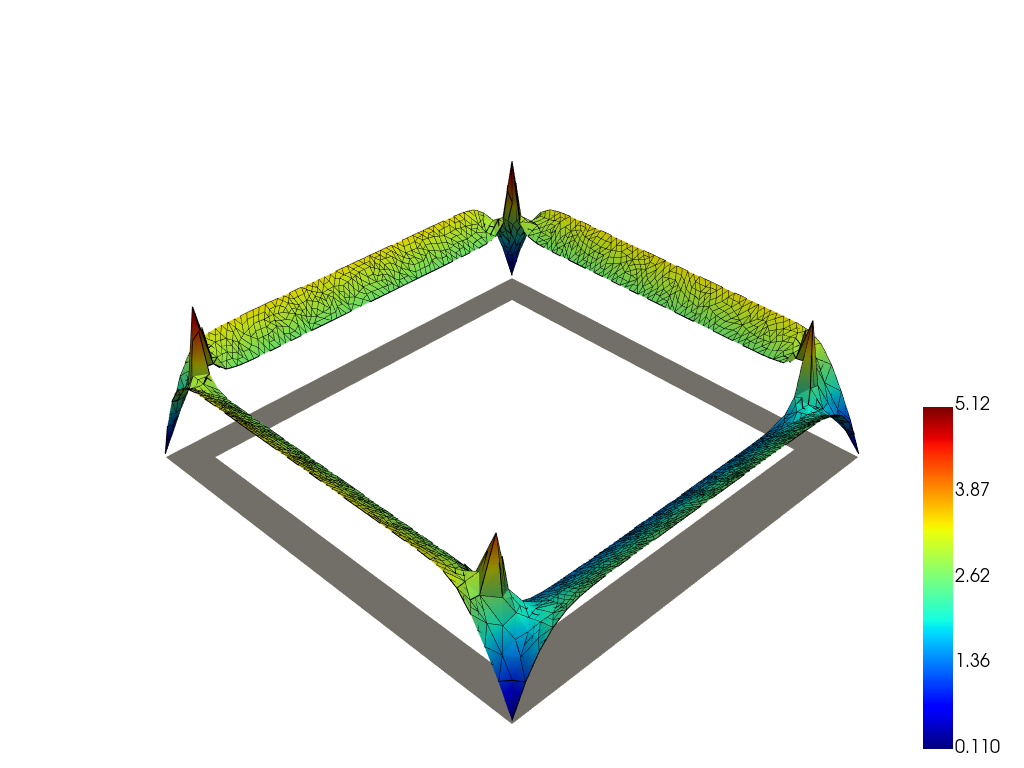

In [23]:
vertices = geom.mesh['vertices']
vertices = np.hstack((vertices, np.zeros((vertices.shape[0], 1))))
triangles = geom.mesh['triangles']
triangles = np.hstack((np.ones((triangles.shape[0], 1)) * 6, triangles)).astype(int)

point_cloud1 = pv.PolyData(vertices, triangles)
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zxy_mzz"]#case1.get_stress()[0]["sig_zx_vy"]#

vertices2[:, -1] += s * 10
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

z = vertices[:, 1].copy()
cz = -sec.get_c()[1]
z -= sec.get_c()[1]

#Sy = b/8*(h**2-4*z**2)
#Iy = sec.get_ic()[0]
# tau = Vy * Sy / Iy / b
# vertices3 = vertices.copy()
# vertices3[:, -1] += tau * 100
# point_cloud3 = pv.PolyData(vertices3, triangles)
# point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey', render_points_as_spheres=True)
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud2, scalars=s, cmap='jet')
#pl.add_mesh(point_cloud3, scalars=tau, render_points_as_spheres=True)

# pl.camera_position = [(-309.3239134228143, 190.9448824743177, 361.0875938420543),
#  (261.84846177303075, 45.81828788132555, -203.1925420629693),
#  (0.15391266219003122, 0.98330165885624, -0.09710169982108453)]

pl.show()

## Tenkostěnný otevřený

In [24]:
rect1 = rectangular_section(140, 140)
rect2 = rectangular_section(115, 120).shift_section(x_offset=10, y_offset=10)
cut_rect = rectangular_section(30, 1).shift_section(69.5, 0)

geom = rect1 - rect2 - cut_rect
#geom.plot_geometry()

geom.create_mesh(mesh_sizes=5)

sec = Section(geometry=geom)
#sec.plot_mesh(materials=False)

sec.calculate_geometric_properties()
sec.calculate_warping_properties()
#sec.calculate_plastic_properties()

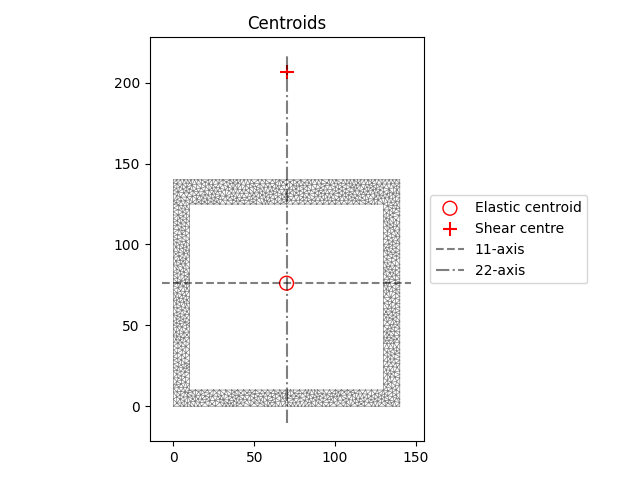

<Axes: title={'center': 'Centroids'}>

In [25]:
sec.plot_centroids()

In [26]:
case1 = sec.calculate_stress(mzz=1e6)

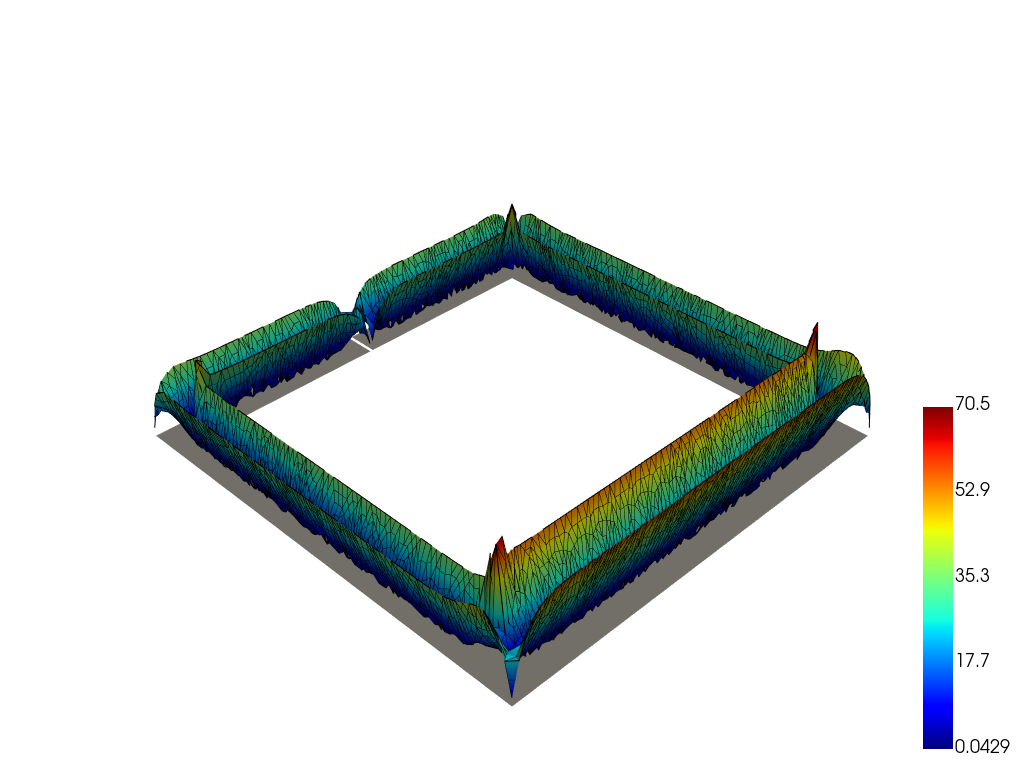

In [27]:
vertices = geom.mesh['vertices']
vertices = np.hstack((vertices,np.zeros((vertices.shape[0], 1))))
triangles = geom.mesh['triangles']
triangles = np.hstack((np.ones((triangles.shape[0], 1)) * 6, triangles)).astype(int)

point_cloud1 = pv.PolyData(vertices, triangles)
vertices2 = vertices.copy()

#s = case1.get_stress()[0]["sig_zx_mzz"] + case1.get_stress()[0]["sig_zy_mzz"]# case1.get_stress()[0]["sig_zx_vy"]#
s = case1.get_stress()[0]["sig_zxy_mzz"]

vertices2[:, -1] += s /2
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

z = vertices[:, 1].copy()
cz = -sec.get_c()[1]
z -= sec.get_c()[1]

# Sy = np.piecewise(z, [z < cz-20, z >= cz-20], 
#                      [lambda z: 14 * (220-cz-z)*(z+(220-cz-z)/2), lambda z: 200 * (cz-z)*(z+(cz-z)/2)])
# b = np.piecewise(z, [z < cz-20, z >= cz-20], [14, 200])
# Iy = sec.get_ic()[0]
# tau = Vy * Sy / Iy / b
# vertices3 = vertices.copy()
# vertices3[:, -1] += tau * 10
# point_cloud3 = pv.PolyData(vertices3, triangles)
# point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey')
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud2, scalars=s, cmap='jet')
#pl.add_mesh(point_cloud3, scalars=tau)

# pl.camera_position = [(-199.30013399531435, -36.66875777935179, 326.2037228028328),
#  (259.9128540923312, -140.46951776126153, -156.53727430301635),
#  (0.1336815291017418, 0.9873603532801041, -0.08513977653017402)]

pl.show()

## Tenkostěnný T-profil

In [28]:
# list of points describing the geometry
points = [
    (0, 0),  # bottom plate
    (0, -20),
    (93, -20),
    (93, -220),
    (107, -220),  # inverted angle section
    (107, -20),
    (200, -20),
    (200, 0),
]

# list of facets (edges) describing the geometry connectivity
facets = [
    (0, 1),  # bottom plate
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),  # inverted angle section
    (5, 6),
    (6, 7),
    (7, 0),
]

# list of control points (points within each region)
control_points = [
    (100, -10),  # bottom plate
]

geom = CompoundGeometry.from_points(
    points=points,
    facets=facets,
    control_points=control_points,
)
#geom.plot_geometry()

geom.create_mesh(mesh_sizes=5)

sec = Section(geometry=geom)
#sec.plot_mesh(materials=False)

sec.calculate_geometric_properties()
sec.calculate_warping_properties()
#sec.calculate_plastic_properties()

/home/kelidas/anaconda3/lib/python3.11/site-packages/sectionproperties/analysis/section.py:342: UserWarning: 
The section geometry contains disjoint regions which is invalid for warping analysis.
 Please revise your geometry to ensure there is connectivity between all regions.
 Please see https://sectionproperties.rtfd.io/en/stable/user_guide/analysis.html#warping-analysis for more information.
  warnings.warn(msg)


In [29]:
#sec.display_results(fmt="g")

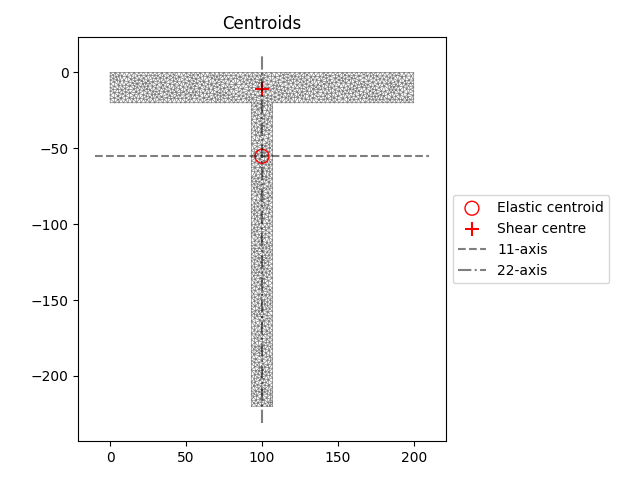

<Axes: title={'center': 'Centroids'}>

In [30]:
sec.plot_centroids()

In [31]:
case1 = sec.calculate_stress(mzz=1e6)

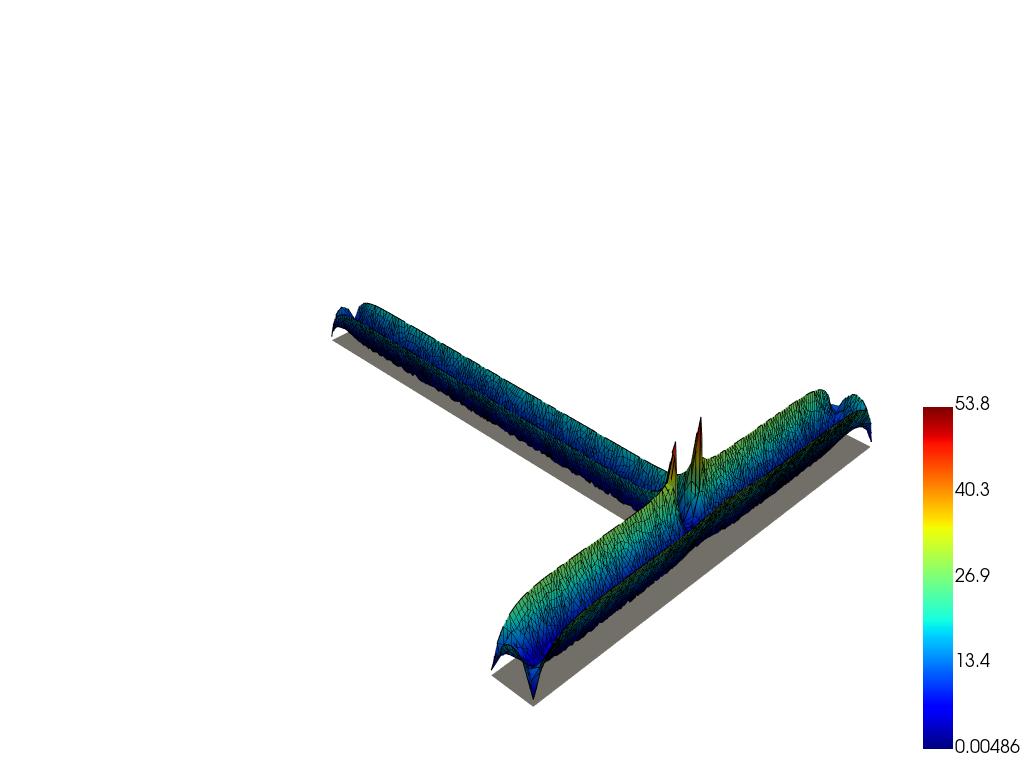

In [32]:
vertices = geom.mesh['vertices']
vertices = np.hstack((vertices,np.zeros((vertices.shape[0], 1))))
triangles = geom.mesh['triangles']
triangles = np.hstack((np.ones((triangles.shape[0], 1)) * 6, triangles)).astype(int)

point_cloud1 = pv.PolyData(vertices, triangles)
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zxy_mzz"]
vertices2[:, -1] += s
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

z = vertices[:, 1].copy()
cz = -sec.get_c()[1]
z -= sec.get_c()[1]

# Sy = np.piecewise(z, [z < cz-20, z >= cz-20], 
#                      [lambda z: 14 * (220-cz-z)*(z+(220-cz-z)/2), lambda z: 200 * (cz-z)*(z+(cz-z)/2)])
# b = np.piecewise(z, [z < cz-20, z >= cz-20], [14, 200])
# Iy = sec.get_ic()[0]
# tau = Vy * Sy / Iy / b
# vertices3 = vertices.copy()
# vertices3[:, -1] += tau * 10
# point_cloud3 = pv.PolyData(vertices3, triangles)
# point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey')
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud2, scalars=s, cmap='jet')
#pl.add_mesh(point_cloud3, scalars=tau)

# pl.camera_position = [(-199.30013399531435, -36.66875777935179, 326.2037228028328),
#  (259.9128540923312, -140.46951776126153, -156.53727430301635),
#  (0.1336815291017418, 0.9873603532801041, -0.08513977653017402)]

pl.show()

## Masivní T-profil

In [33]:
# list of points describing the geometry
points = [
    (0, 0),  # bottom plate
    (0, -450),
    (150, -450),
    (150, -900),
    (450, -900),  # inverted angle section
    (450, -450),
    (600, -450),
    (600, 0),
]

# list of facets (edges) describing the geometry connectivity
facets = [
    (0, 1),  # bottom plate
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),  # inverted angle section
    (5, 6),
    (6, 7),
    (7, 0),
]

# list of control points (points within each region)
control_points = [
    (300, -300),  # bottom plate
]

geom = CompoundGeometry.from_points(
    points=points,
    facets=facets,
    control_points=control_points,
)
#geom.plot_geometry()

geom.create_mesh(mesh_sizes=[100, 100])

sec = Section(geometry=geom)
#sec.plot_mesh(materials=False)

sec.calculate_geometric_properties()
sec.calculate_warping_properties()
#sec.calculate_plastic_properties()

/home/kelidas/anaconda3/lib/python3.11/site-packages/sectionproperties/analysis/section.py:342: UserWarning: 
The section geometry contains disjoint regions which is invalid for warping analysis.
 Please revise your geometry to ensure there is connectivity between all regions.
 Please see https://sectionproperties.rtfd.io/en/stable/user_guide/analysis.html#warping-analysis for more information.
  warnings.warn(msg)


In [34]:
#sec.display_results(fmt="g")

In [35]:
case1 = sec.calculate_stress(mzz=1e6)

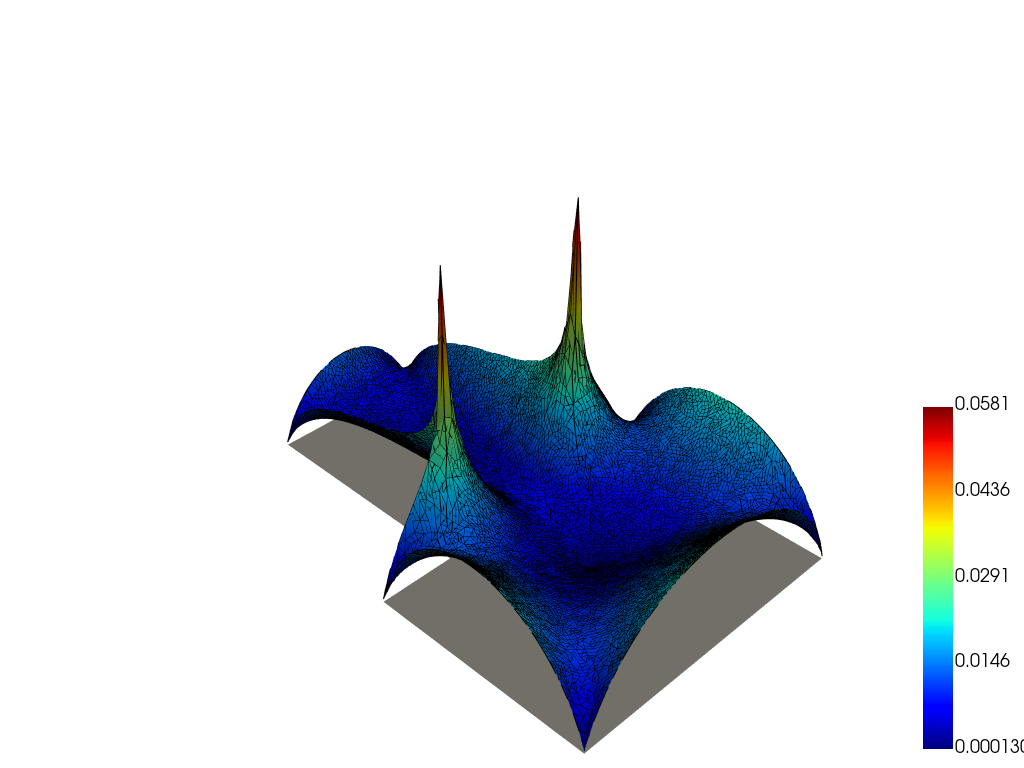

In [36]:
vertices = geom.mesh['vertices']
vertices = np.hstack((vertices,np.zeros((vertices.shape[0], 1))))
triangles = geom.mesh['triangles']
triangles = np.hstack((np.ones((triangles.shape[0], 1)) * 6, triangles)).astype(int)

point_cloud1 = pv.PolyData(vertices, triangles)
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zxy_mzz"]
vertices2[:, -1] += s * 10000
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

z = vertices[:, 1].copy()
cz = -sec.get_c()[1]
z -= sec.get_c()[1]

# Sy = np.piecewise(z, [z < cz-20, z >= cz-20], 
#                      [lambda z: 14 * (220-cz-z)*(z+(220-cz-z)/2), lambda z: 200 * (cz-z)*(z+(cz-z)/2)])
# b = np.piecewise(z, [z < cz-20, z >= cz-20], [14, 200])
# Iy = sec.get_ic()[0]
# tau = Vy * Sy / Iy / b
# vertices3 = vertices.copy()
# vertices3[:, -1] += tau * 10
# point_cloud3 = pv.PolyData(vertices3, triangles)
# point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey')
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud2, scalars=s, cmap='jet')
#pl.add_mesh(point_cloud3, scalars=tau)

# pl.camera_position = [(-199.30013399531435, -36.66875777935179, 326.2037228028328),
#  (259.9128540923312, -140.46951776126153, -156.53727430301635),
#  (0.1336815291017418, 0.9873603532801041, -0.08513977653017402)]

pl.show()